### <strong> Filename: </strong> <em>covid_19_time_series_comfirmed_cases.ipynb<em>
##### <strong>Description:</strong> <em>Creates an Scatter plot of all confirmed cases of COVID-19 in the world using dataset provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases</em>
##### <strong>Author:</strong> <em> Carlos Eduardo Beluzo (cbeluzo@gmail.com)</em>
##### <strong>Creation:</strong> <em> Mar/2020 </em>
##### <strong>Version:</strong> <em> 2020.03-3 </em>

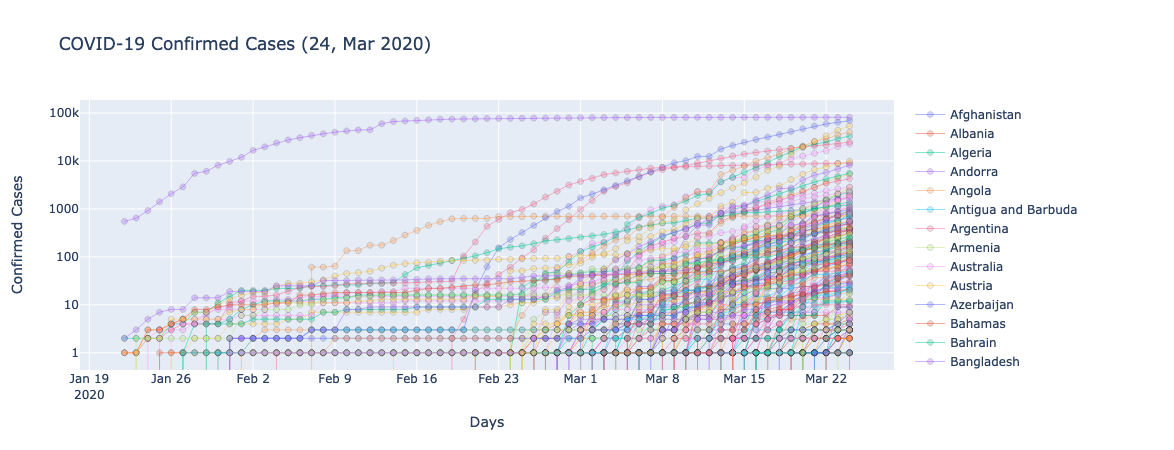

In [72]:
import numpy as np
import pandas as pd
import datetime as dt
import plotly.graph_objects as go
import plotly as plt

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df['Province/State'] = df['Province/State'].fillna('n/a')
df = df.fillna(0)
#df.head()

dfA = df.drop(['Province/State','Lat','Long'], axis = 1)
dfA = dfA.groupby('Country/Region').sum().T
dfA = dfA.reset_index()
dfA = dfA.rename(columns = {'index':'Day'})
dfA[['Day']] = pd.to_datetime(dfA['Day'],utc=False)
#dfA.head()

fig = go.Figure()

last_upt = dt.date.today() #- dt.timedelta(days=1)

title = 'COVID-19 Confirmed Cases (' + "{:%d, %b %Y}".format(last_upt) +')'
autor = "Author: Prof. Carlos Ed Beluzo - cbeluzo@gmail.com </a>"
data_source= 'Data source: data.humdata.org'

for country in dfA.columns[1:]:
#for country in ['Brazil','China']:
    fig.add_trace(go.Scatter(x=dfA.Day, 
                             y=dfA[country], 
                             mode='lines+markers', 
                             name=country,
                             text=np.full((dfA.shape[1],1), country), 
                             line=dict(width=0.5), 
                             marker = dict(opacity= 0.3, line = dict(width = 0.5,color = 'rgb(0, 0, 0)')),
                             hovertemplate = "<b>%{text}</b><br>" +
                                             "<b>Day</b>: %{x}<br>" +
                                             "<b>%{yaxis.title.text}</b>: %{y}<br>" +
                                             "<extra></extra>"
                             )
                 )
    
annotations = []

# Source
#annotations.append(dict(xref='paper', yref='paper', x=0.25, y=1.09, xanchor='center', yanchor='top', text=autor + ' | ' + data_source,
#                              font=dict(family='Arial', size=12, color='rgb(150,150,150)'), showarrow=False))

fig.update_layout(annotations=annotations,
                 xaxis_title='Days',
                 yaxis_title='Confirmed Cases',
                 yaxis_type="log",
                 title_text=title)
#fig.show()
plt.offline.plot(fig, filename="html/covid_19_time_series_comfirmed_cases.html")
dfA.to_csv (r'data/covid_19_time_series_comfirmed_cases.csv', index = False, header=True)